In [13]:
import pickle
import numpy as np


In [32]:
with open('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-vocab.pkl', 'rb') as f:
    vocab_pkl = pickle.load(f)

In [33]:
embeddings_npy = np.load('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-w.npy')


In [35]:
word_to_embedding = {word: embeddings_npy[i] for i, word in enumerate(vocab_pkl)}



In [37]:
import pickle
import numpy as np

with open('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-vocab.pkl', 'rb') as f:
    vocab_pkl = pickle.load(f)


word_to_embedding = {word: embeddings_npy[i] for i, word in enumerate(vocab_pkl)}

embeddings_npy = np.load('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-w.npy')


# Normalize the embeddings
def normalize_embeddings(embeddings):
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    return embeddings / norms

# Normalizing the embeddings
normalized_embeddings = normalize_embeddings(embeddings_npy)

gender_direction = normalized_embeddings["he"] - normalized_embeddings["she"]

def gender_bias_score(word, embeddings, gender_direction):
    return np.dot(embeddings[word], gender_direction)

word_list = ["doctor", "nurse", "engineer", "teacher"]
bias_scores = {word: gender_bias_score(word, normalized_embeddings, gender_direction) for word in word_list}
print(bias_scores)


In [30]:
# Normalizing the embeddings
normalized_embeddings = normalize_embeddings(embeddings_npy)

In [31]:
gender_direction = normalized_embeddings["he"] - normalized_embeddings["she"]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

{'doctor': 0.062371756605268065, 'nurse': -0.2614263184726271, 'engineer': 0.1860039892610614, 'teacher': 0.1835548926845095}


/var/folders/l0/978kqtls1gb5jnv3rvxtjpvh0000gn/T/ipykernel_90527/3748982064.py:15: RuntimeWarning: invalid value encountered in true_divide
  return embeddings / norms


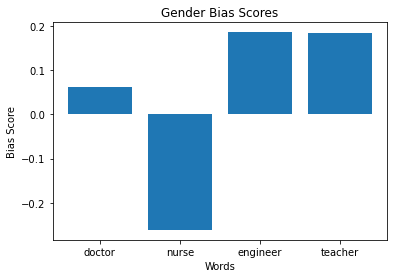

In [38]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-vocab.pkl', 'rb') as f:
    vocab_pkl = pickle.load(f)

embeddings_npy = np.load('/Users/parkermoesta/Library/Mobile Documents/com~apple~CloudDocs/NLP_projects/Word Embedding Biases/NLP_word_embedding_bias/sgns/1800-w.npy')

word_to_embedding = {word: embeddings_npy[i] for i, word in enumerate(vocab_pkl)}

# Normalize the embeddings
def normalize_embeddings(embeddings):
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    return embeddings / norms

# Normalizing the embeddings
normalized_embeddings = normalize_embeddings(embeddings_npy)

gender_direction = normalized_embeddings[vocab_pkl.index("he")] - normalized_embeddings[vocab_pkl.index("she")]

def gender_bias_score(word, embeddings, gender_direction, vocab):
    return np.dot(embeddings[vocab.index(word)], gender_direction)

word_list = ["doctor", "nurse", "engineer", "teacher"]
bias_scores = {word: gender_bias_score(word, normalized_embeddings, gender_direction, vocab_pkl) for word in word_list}
print(bias_scores)

# Visualization
words = list(bias_scores.keys())
scores = list(bias_scores.values())

plt.bar(words, scores)
plt.title("Gender Bias Scores")
plt.xlabel("Words")
plt.ylabel("Bias Score")
plt.show()